In [1]:
import os
import pandas as pd
import glob
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
def load_dataframes(folder_path):
    dfs = []
    for file in glob.glob(folder_path + "/*.csv"):
        df = pd.read_csv(file)
        company_name = os.path.basename(os.path.dirname(file))
        df['company'] = company_name
        dfs.append(df)
    return pd.concat(dfs, ignore_index=True)

In [3]:
fampay_df = load_dataframes("App-Comp/Fampay")

direct_comp_df = load_dataframes("App-Comp/Direct_Comp/*")
mainstream_comp_df = load_dataframes("App-Comp/Mainstream_Comp/*")
potential_comp_df = load_dataframes("App-Comp/Potential_Comp/*")

In [4]:
def sentiment_score(text):
    if not isinstance(text, str):
        return None
    return TextBlob(text).sentiment.polarity

for df in [fampay_df, direct_comp_df, mainstream_comp_df, potential_comp_df]:
    df = df[df['content'].apply(lambda x: isinstance(x, str))]
    df['sentiment'] = df['content'].apply(sentiment_score)  # type: ignore

C:\Users\Harsh Clean\AppData\Local\Temp\ipykernel_42744\1175645132.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentiment'] = df['content'].apply(sentiment_score)  # type: ignore
C:\Users\Harsh Clean\AppData\Local\Temp\ipykernel_42744\1175645132.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentiment'] = df['content'].apply(sentiment_score)  # type: ignore


In [5]:
def response_rate(df):
    total_reviews = len(df)
    total_responses = len(df[df['replyContent'].notnull()])
    return total_responses / total_reviews * 100

response_rates = {}
for df, comp_type in [(fampay_df, 'Fampay'), (direct_comp_df, 'Direct_Comp'), (mainstream_comp_df, 'Mainstream_Comp'), (potential_comp_df, 'Potential_Comp')]:
    grouped = df.groupby('company')
    response_rates[comp_type] = grouped.apply(response_rate)

In [6]:
dfs = [fampay_df, direct_comp_df, mainstream_comp_df, potential_comp_df]

for i, df in enumerate(dfs):
    df = df[df['content'].apply(lambda x: isinstance(x, str))]
    df['sentiment'] = df['content'].apply(sentiment_score) # type: ignore
    dfs[i] = df

C:\Users\Harsh Clean\AppData\Local\Temp\ipykernel_42744\2671899244.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentiment'] = df['content'].apply(sentiment_score) # type: ignore
C:\Users\Harsh Clean\AppData\Local\Temp\ipykernel_42744\2671899244.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentiment'] = df['content'].apply(sentiment_score) # type: ignore


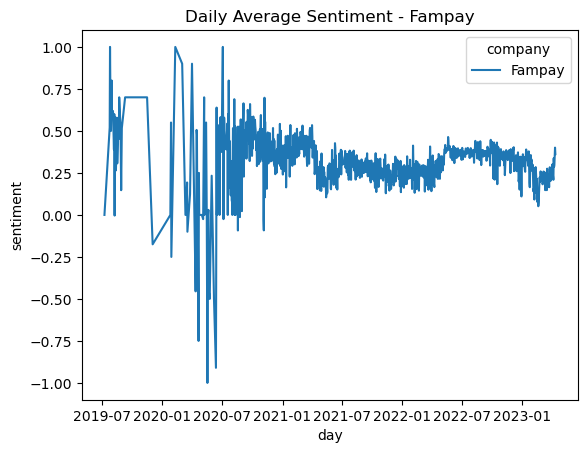

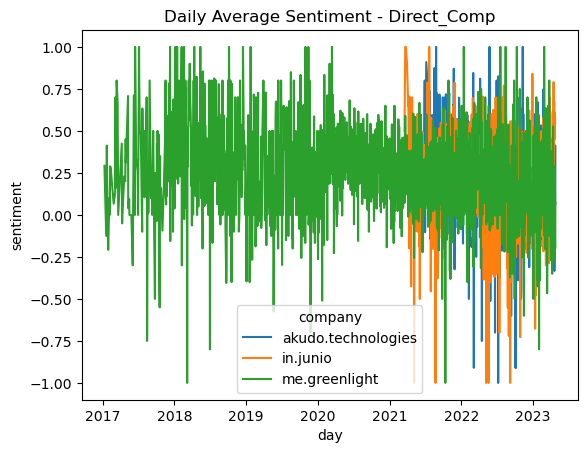

C:\Users\Harsh Clean\AppData\Local\Temp\ipykernel_42744\806070795.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['at'] = pd.to_datetime(df['at'])
C:\Users\Harsh Clean\AppData\Local\Temp\ipykernel_42744\806070795.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['day'] = df['at'].dt.date


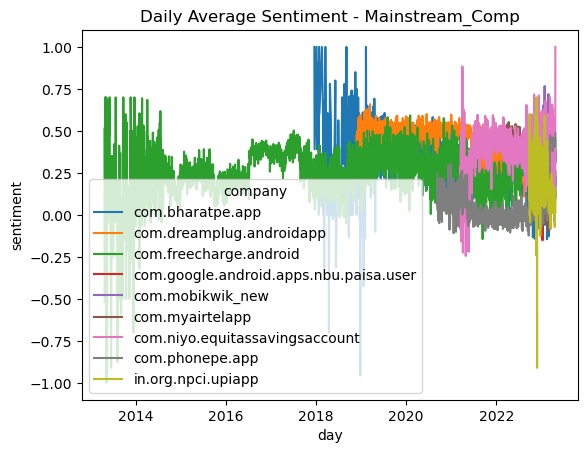

C:\Users\Harsh Clean\AppData\Local\Temp\ipykernel_42744\806070795.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['at'] = pd.to_datetime(df['at'])
C:\Users\Harsh Clean\AppData\Local\Temp\ipykernel_42744\806070795.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['day'] = df['at'].dt.date


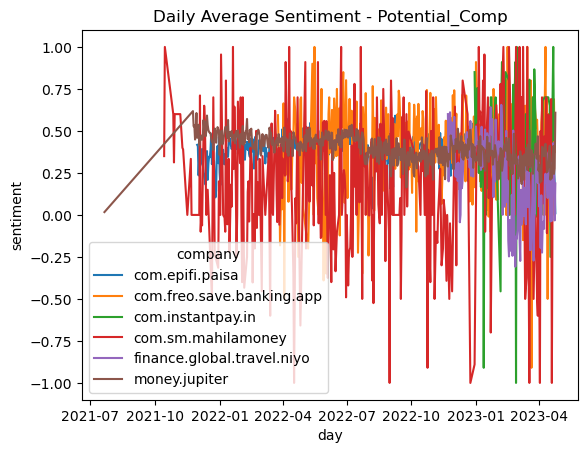

In [7]:
def plot_time_series(df, comp_type):
    if 'sentiment' not in df.columns:
        print(f"Sentiment column not found in DataFrame for {comp_type}")
        return

    df['at'] = pd.to_datetime(df['at'])
    df['day'] = df['at'].dt.date
    daily_sentiment = df.groupby(['company', 'day'])['sentiment'].mean().reset_index()

    sns.lineplot(data=daily_sentiment, x='day', y='sentiment', hue='company')
    plt.title(f"Daily Average Sentiment - {comp_type}")
    plt.show()

for df, comp_type in zip(dfs, ['Fampay', 'Direct_Comp', 'Mainstream_Comp', 'Potential_Comp']):
    plot_time_series(df, comp_type)

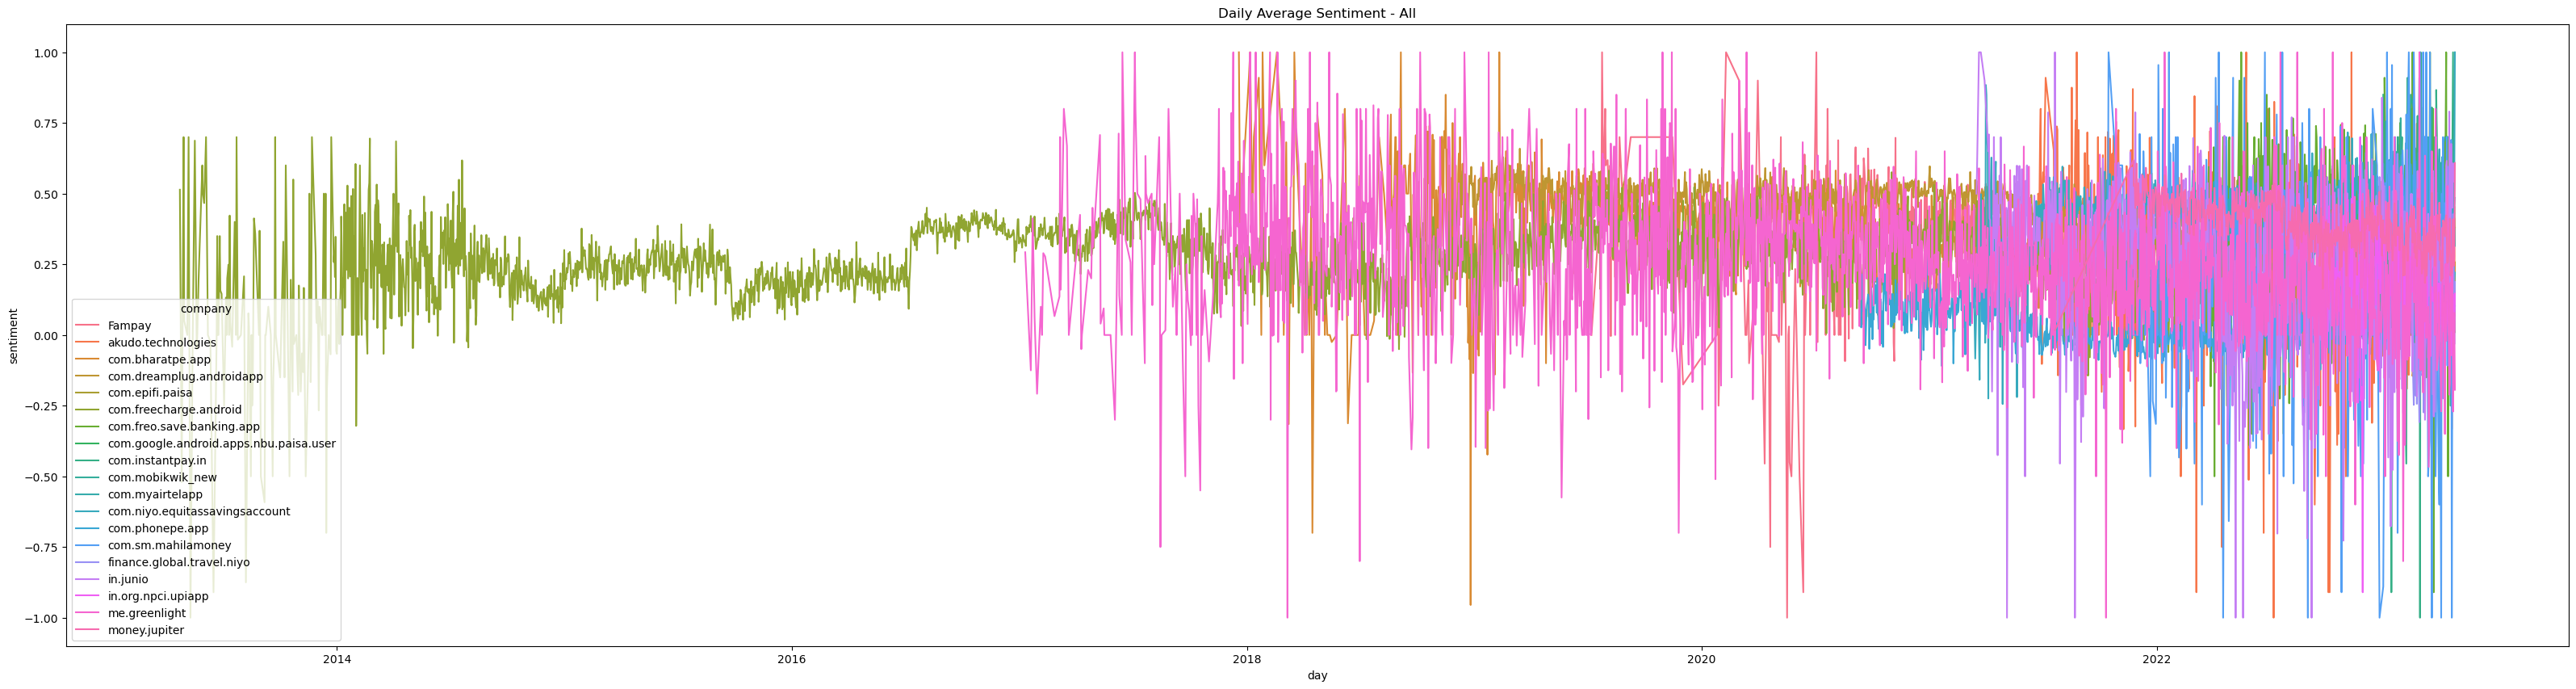

In [8]:
# combine all the graphs into one and compare it to famapy
all_df = pd.concat(dfs, ignore_index=True)
# make the graph bigger so that it is easier to read
plt.figure(figsize=(40, 10))
plot_time_series(all_df, 'All')

In [9]:
for i, df in enumerate(dfs):
    df = df[df['content'].apply(lambda x: isinstance(x, str))]
    df['at'] = pd.to_datetime(df['at'])
    df['repliedAt'] = pd.to_datetime(df['repliedAt'])
    df['response_time'] = (df['repliedAt'] - df['at']).dt.total_seconds() / 3600  # Convert response time to hours
    dfs[i] = df

In [10]:
def plot_response_time(df, comp_type):
    if 'response_time' not in df.columns:
        print(f"Response time column not found in DataFrame for {comp_type}")
        return

    df['day'] = df['at'].dt.date
    daily_response_time = df.groupby(['company', 'day'])['response_time'].mean().reset_index()

    sns.lineplot(data=daily_response_time, x='day', y='response_time', hue='company')
    plt.title(f"Daily Average Response Time (Hours) - {comp_type}")
    plt.show()

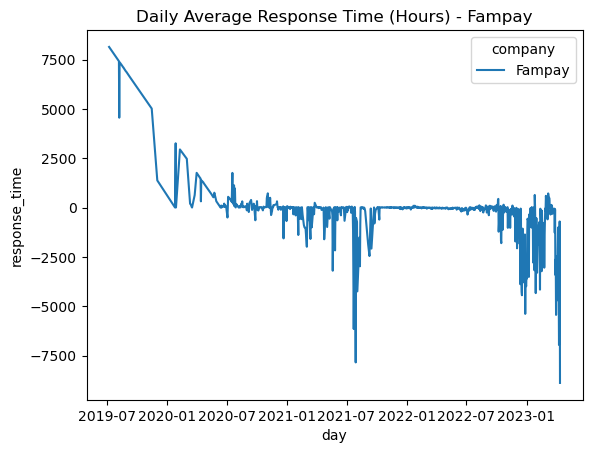

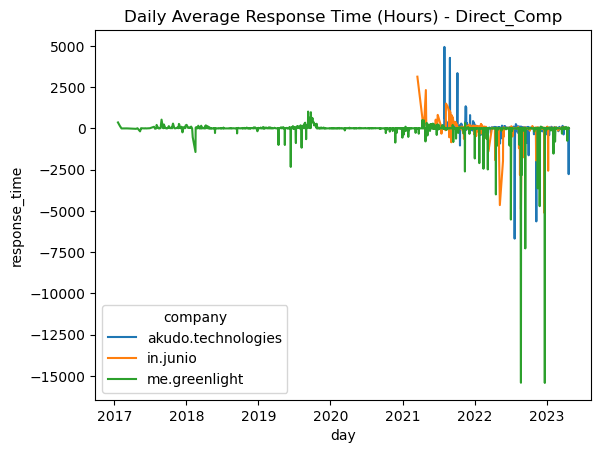

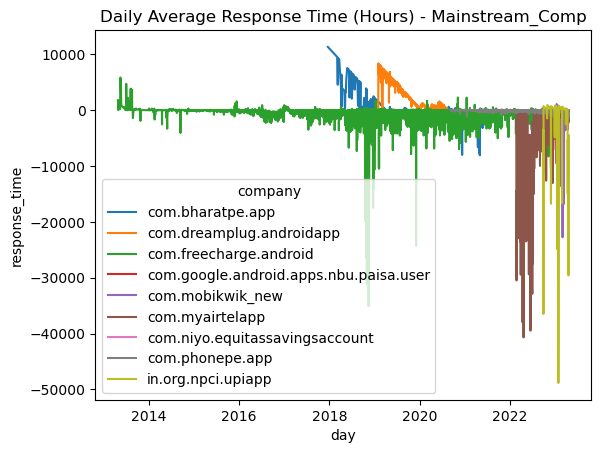

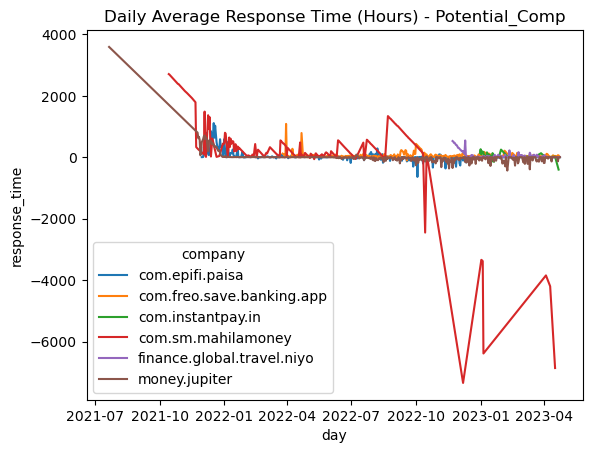

In [11]:
for df, comp_type in zip(dfs, ['Fampay', 'Direct_Comp', 'Mainstream_Comp', 'Potential_Comp']):
    plot_response_time(df, comp_type)

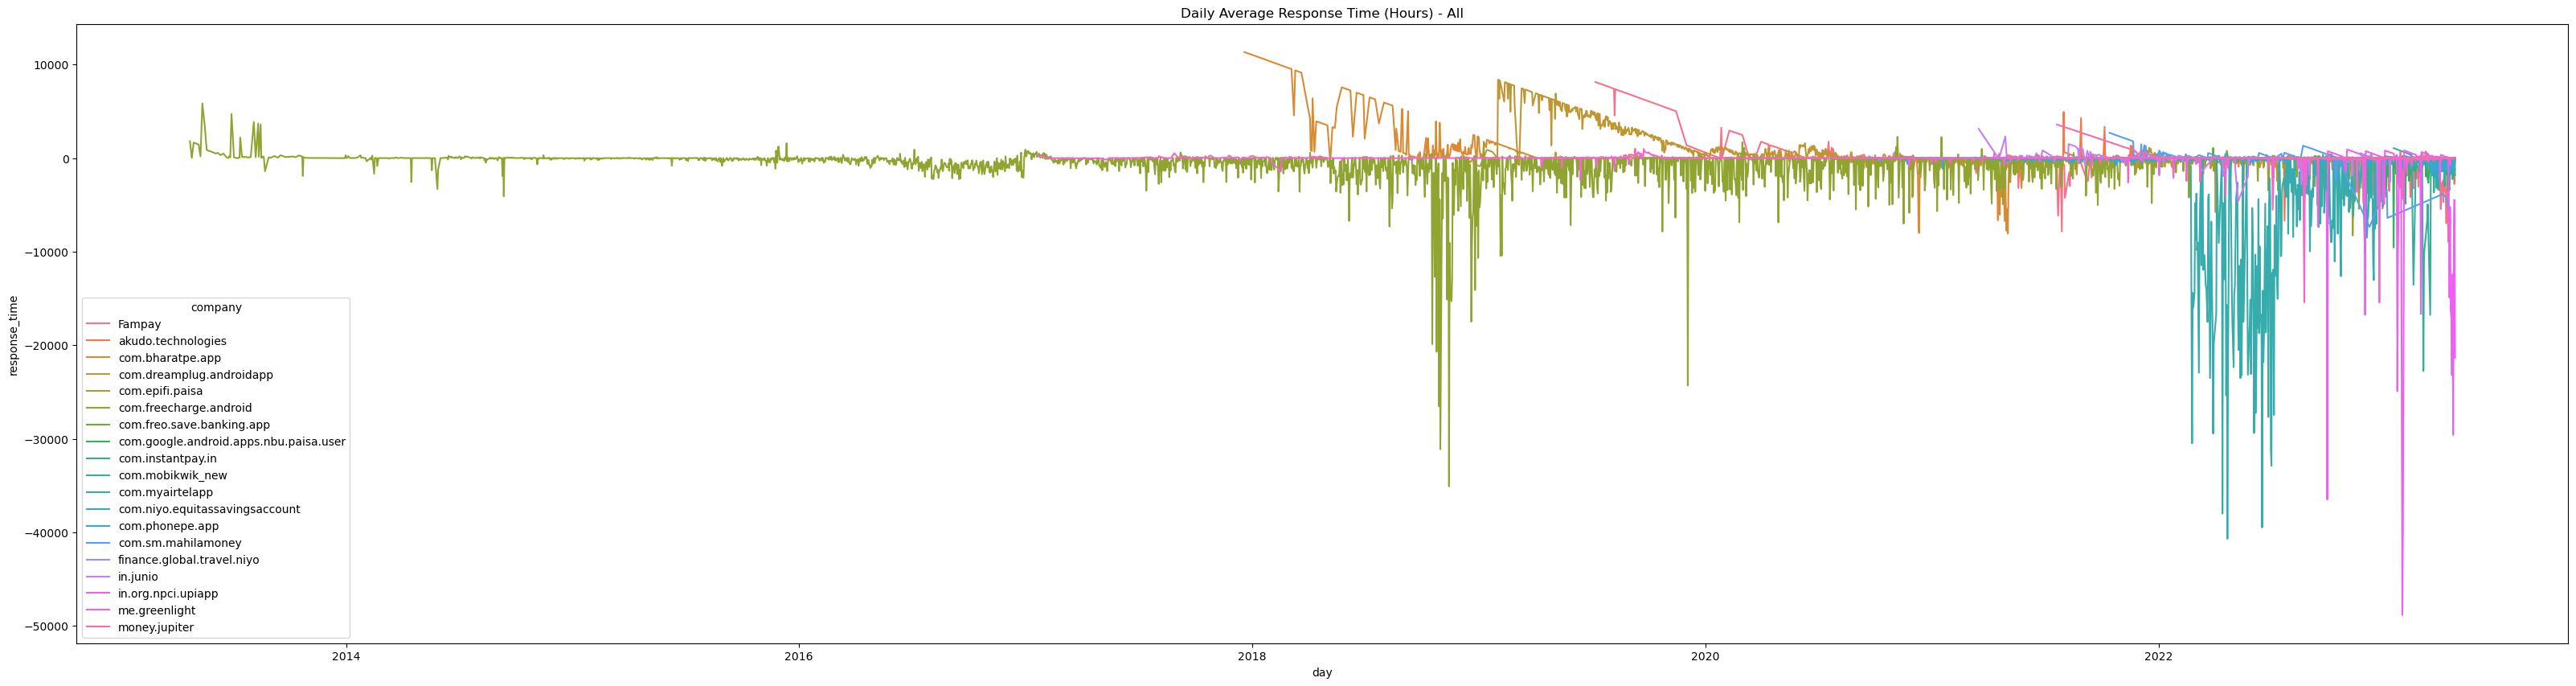

In [12]:
# combine all the graphs into one and compare it to famapy
all_df = pd.concat(dfs, ignore_index=True)
plt.figure(figsize=(40, 10))
plot_response_time(all_df, 'All')

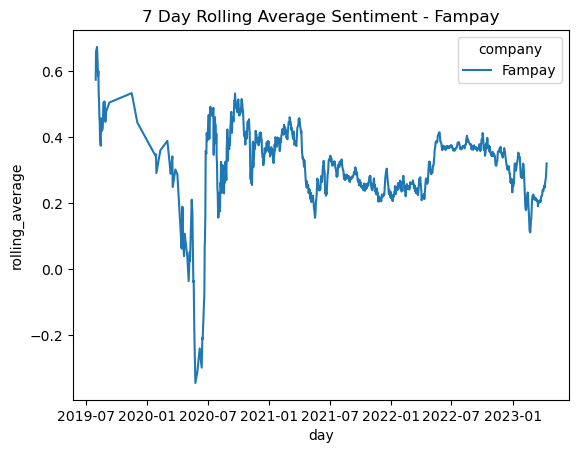

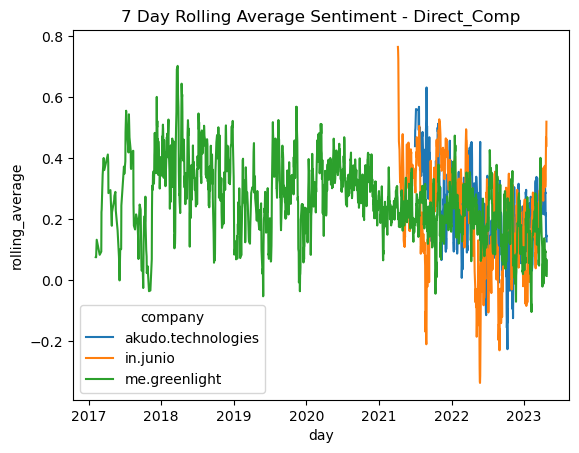

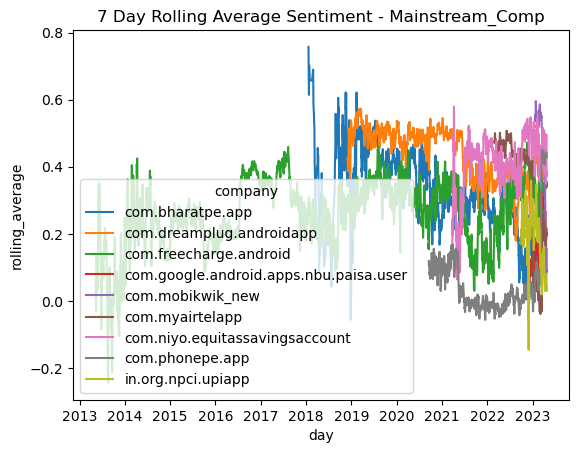

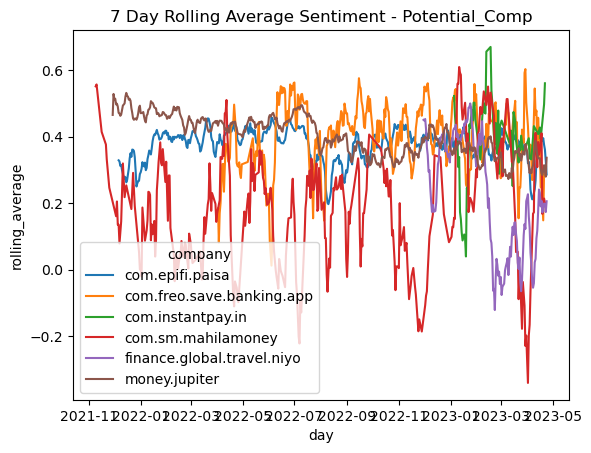

In [13]:
# calculates a rolling average of review scores
def rolling_average(df, comp_type):
    if 'sentiment' not in df.columns:
        print(f"Sentiment column not found in DataFrame for {comp_type}")
        return

    df['at'] = pd.to_datetime(df['at'])
    df['day'] = df['at'].dt.date
    daily_sentiment = df.groupby(['company', 'day'])['sentiment'].mean().reset_index()
    daily_sentiment['rolling_average'] = daily_sentiment.groupby('company')['sentiment'].rolling(7).mean().reset_index(0, drop=True)
    sns.lineplot(data=daily_sentiment, x='day', y='rolling_average', hue='company')
    plt.title(f"7 Day Rolling Average Sentiment - {comp_type}")
    plt.show()

for df, comp_type in zip(dfs, ['Fampay', 'Direct_Comp', 'Mainstream_Comp', 'Potential_Comp']):
    rolling_average(df, comp_type)

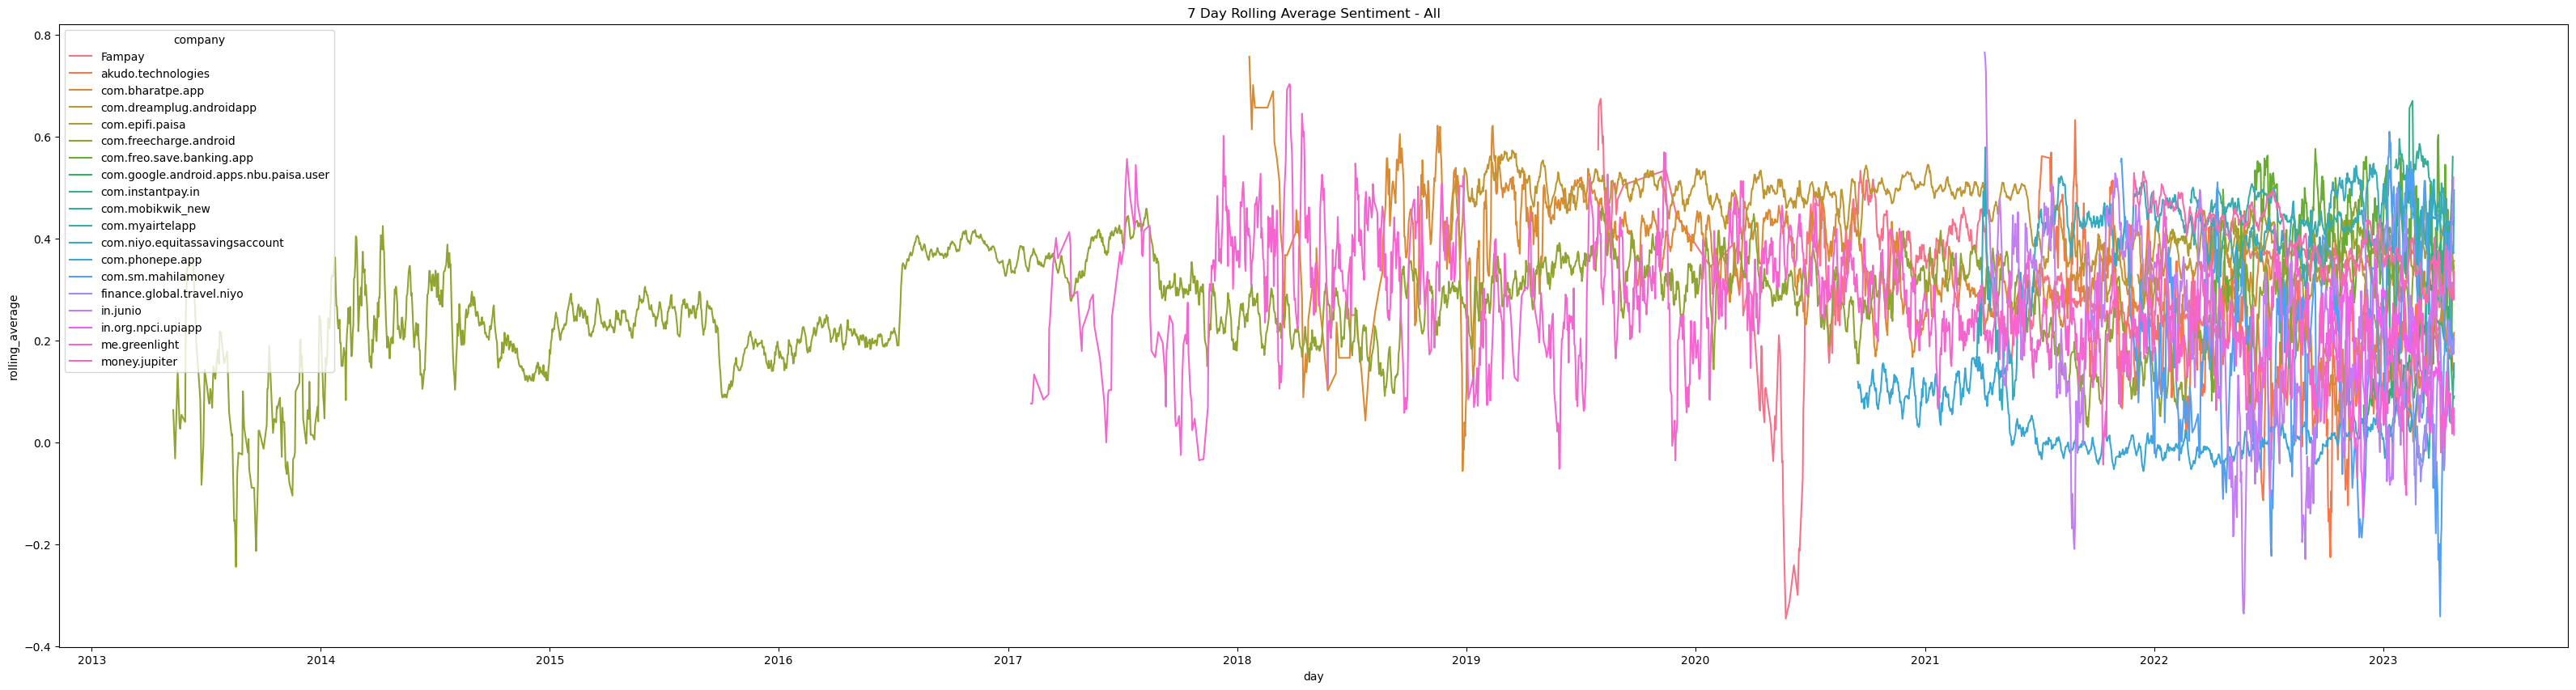

In [14]:
# make one graph for all the companies and compare it to famapy
all_df = pd.concat(dfs, ignore_index=True)
plt.figure(figsize=(40, 10))
rolling_average(all_df, 'All')